In [200]:
import pandas as pd
from pandasql import sqldf
import numpy as np

In [201]:
# -----------------------------
# 1. LOAD & SORT DATA
# -----------------------------
df = pd.read_csv(r'C:\Users\dan9b\Downloads\atp_tennis.csv')

# Convert date
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.sort_values("Date").reset_index(drop=True)

# Output table
matches = df.copy()
matches.head(100)

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
0,Chile Open,2020-01-03,ATP250,Indoor,Clay,The Final,3,Ruud C.,Seyboth Wild T.,Seyboth Wild T.,38,182,1219,277,1.33,3.40,5-7 6-4 3-6
1,Abierto Mexicano,2020-01-03,ATP500,Outdoor,Hard,The Final,3,Nadal R.,Fritz T.,Nadal R.,2,35,9395,1255,1.06,10.00,6-3 6-2
2,US Open,2020-01-09,Grand Slam,Outdoor,Hard,1st Round,5,Kwon S.W.,Kwiatkowski T.S.,Kwon S.W.,73,187,742,281,1.36,3.20,3-6 7-6 6-1 6-2
3,US Open,2020-01-09,Grand Slam,Outdoor,Hard,1st Round,5,Lopez F.,Carballes Baena R.,Carballes Baena R.,57,101,908,614,1.44,2.75,6-3 6-7 4-6 3-6
4,US Open,2020-01-09,Grand Slam,Outdoor,Hard,1st Round,5,Bautista Agut R.,Sandgren T.,Bautista Agut R.,11,48,2540,1013,1.16,5.00,6-4 6-4 7-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ASB Classic,2020-01-18,ATP250,Outdoor,Hard,The Final,3,Rublev A.,Harris L.,Rublev A.,18,91,1799,594,1.33,3.40,6-3 6-0
96,Adelaide International,2020-01-18,ATP250,Outdoor,Hard,The Final,3,Humbert U.,Paire B.,Humbert U.,57,24,900,1598,1.72,2.10,7-6 3-6 7-6
97,Australian Open,2020-01-20,Grand Slam,Outdoor,Hard,1st Round,5,Struff J.L.,Djokovic N.,Djokovic N.,37,2,1270,9720,23.00,1.01,6-7 2-6 6-2 1-6
98,Australian Open,2020-01-20,Grand Slam,Outdoor,Hard,1st Round,5,Harris A.,Berrettini M.,Berrettini M.,162,8,316,2870,7.00,1.10,3-6 1-6 3-6


In [208]:
# Some Number/ Stats on our dataset
# Number of Tournaments
query = """
SELECT DISTINCT COUNT( DISTINCT Tournament) AS Num_of_Tournament
FROM matches
"""

# Execute the SQL query on the DataFrame
number_of_tournaments = sqldf(query)

# Display the result
print(number_of_tournaments)

   Num_of_Tournament
0                105


In [209]:
# Number of Series
query = """
SELECT DISTINCT COUNT( DISTINCT Series) AS Num_of_Series
FROM matches
"""

# Execute the SQL query on the DataFrame
number_of_series = sqldf(query)

# Display the result
print(number_of_series)

   Num_of_Series
0              5


In [179]:
# ==========================================================================================
# 2. BASIC FEATURES (Rank, Odds, Tournament Info)
# ==========================================================================================

# Rank diff
matches["rank_diff"] = matches["Rank_2"] - matches["Rank_1"]

# Odds diff
matches["odds_diff"] = matches["Odd_2"] - matches["Odd_1"]

# Implied probabilities (only if odds > 0)
matches["prob_1"] = np.where(matches["Odd_1"] > 0, 1 / matches["Odd_1"], np.nan)
matches["prob_2"] = np.where(matches["Odd_2"] > 0, 1 / matches["Odd_2"], np.nan)
matches.head(100)

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,...,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score,rank_diff,odds_diff,prob_1,prob_2
0,Chile Open,2020-01-03,ATP250,Indoor,Clay,The Final,3,Ruud C.,Seyboth Wild T.,Seyboth Wild T.,...,182,1219,277,1.33,3.40,5-7 6-4 3-6,144,2.07,0.751880,0.294118
1,Abierto Mexicano,2020-01-03,ATP500,Outdoor,Hard,The Final,3,Nadal R.,Fritz T.,Nadal R.,...,35,9395,1255,1.06,10.00,6-3 6-2,33,8.94,0.943396,0.100000
2,US Open,2020-01-09,Grand Slam,Outdoor,Hard,1st Round,5,Kwon S.W.,Kwiatkowski T.S.,Kwon S.W.,...,187,742,281,1.36,3.20,3-6 7-6 6-1 6-2,114,1.84,0.735294,0.312500
3,US Open,2020-01-09,Grand Slam,Outdoor,Hard,1st Round,5,Lopez F.,Carballes Baena R.,Carballes Baena R.,...,101,908,614,1.44,2.75,6-3 6-7 4-6 3-6,44,1.31,0.694444,0.363636
4,US Open,2020-01-09,Grand Slam,Outdoor,Hard,1st Round,5,Bautista Agut R.,Sandgren T.,Bautista Agut R.,...,48,2540,1013,1.16,5.00,6-4 6-4 7-6,37,3.84,0.862069,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ASB Classic,2020-01-18,ATP250,Outdoor,Hard,The Final,3,Rublev A.,Harris L.,Rublev A.,...,91,1799,594,1.33,3.40,6-3 6-0,73,2.07,0.751880,0.294118
96,Adelaide International,2020-01-18,ATP250,Outdoor,Hard,The Final,3,Humbert U.,Paire B.,Humbert U.,...,24,900,1598,1.72,2.10,7-6 3-6 7-6,-33,0.38,0.581395,0.476190
97,Australian Open,2020-01-20,Grand Slam,Outdoor,Hard,1st Round,5,Struff J.L.,Djokovic N.,Djokovic N.,...,2,1270,9720,23.00,1.01,6-7 2-6 6-2 1-6,-35,-21.99,0.043478,0.990099
98,Australian Open,2020-01-20,Grand Slam,Outdoor,Hard,1st Round,5,Harris A.,Berrettini M.,Berrettini M.,...,8,316,2870,7.00,1.10,3-6 1-6 3-6,-154,-5.90,0.142857,0.909091


In [180]:
from collections import defaultdict, deque

# To ensure strict chronological order:
# 1) Sort by date
# 2) Sort by round importance inside each day so that small rounds come first
# ensure round ordering exists and stable sort
round_order = {
    "1st Round": 1, "2nd Round": 2, "3rd Round": 3,
    "Quarterfinals": 4, "Quarter Finals": 4, "Quarter-Finals": 4,
    "Semifinals": 5, "The Final": 6, "Final": 6
}
matches["round_order"] = matches["Round"].map(round_order).fillna(1)

# stable chronological sort: Date then round_order then Tournament (to be deterministic)
matches = matches.sort_values(["Date", "round_order", "Tournament"]).reset_index(drop=True)


# Series prestige
series_map = {
    "Grand Slam": 4,
    "Masters 1000": 3,
    "ATP 500": 2,
    "International": 1
}
matches["series_importance"] = matches["Series"].map(series_map).fillna(1)
matches = pd.get_dummies(matches, columns=['Court', 'Surface'])
matches.head(100)

,Tournament,Date,Series,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,...,odds_diff,prob_1,prob_2,round_order,series_importance,Court_Indoor,Court_Outdoor,Surface_Clay,Surface_Grass,Surface_Hard
0,Abierto Mexicano,2020-01-03,ATP500,The Final,3,Nadal R.,Fritz T.,Nadal R.,2,35,...,8.94,0.943396,0.100000,6.0,1.0,0,1,0,0,1
1,Chile Open,2020-01-03,ATP250,The Final,3,Ruud C.,Seyboth Wild T.,Seyboth Wild T.,38,182,...,2.07,0.751880,0.294118,6.0,1.0,1,0,1,0,0
2,US Open,2020-01-09,Grand Slam,1st Round,5,Kwon S.W.,Kwiatkowski T.S.,Kwon S.W.,73,187,...,1.84,0.735294,0.312500,1.0,4.0,0,1,0,0,1
3,US Open,2020-01-09,Grand Slam,1st Round,5,Lopez F.,Carballes Baena R.,Carballes Baena R.,57,101,...,1.31,0.694444,0.363636,1.0,4.0,0,1,0,0,1
4,US Open,2020-01-09,Grand Slam,1st Round,5,Bautista Agut R.,Sandgren T.,Bautista Agut R.,11,48,...,3.84,0.862069,0.200000,1.0,4.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ASB Classic,2020-01-18,ATP250,The Final,3,Rublev A.,Harris L.,Rublev A.,18,91,...,2.07,0.751880,0.294118,6.0,1.0,0,1,0,0,1
96,Adelaide International,2020-01-18,ATP250,The Final,3,Humbert U.,Paire B.,Humbert U.,57,24,...,0.38,0.581395,0.476190,6.0,1.0,0,1,0,0,1
97,Australian Open,2020-01-20,Grand Slam,1st Round,5,Struff J.L.,Djokovic N.,Djokovic N.,37,2,...,-21.99,0.043478,0.990099,1.0,4.0,0,1,0,0,1
98,Australian Open,2020-01-20,Grand Slam,1st Round,5,Harris A.,Berrettini M.,Berrettini M.,162,8,...,-5.90,0.142857,0.909091,1.0,4.0,0,1,0,0,1


In [181]:
matches.columns

Index(['Tournament', 'Date', 'Series', 'Round', 'Best of', 'Player_1',
       'Player_2', 'Winner', 'Rank_1', 'Rank_2', 'Pts_1', 'Pts_2', 'Odd_1',
       'Odd_2', 'Score', 'rank_diff', 'odds_diff', 'prob_1', 'prob_2',
       'round_order', 'series_importance', 'Court_Indoor', 'Court_Outdoor',
       'Surface_Clay', 'Surface_Grass', 'Surface_Hard'],
      dtype='object')

In [182]:
# ==========================================================================================
# 3. SCORE-BASED FEATURES (Sets Won, Games Won)
# ==========================================================================================

def extract_game_stats(score):
    try:
        sets_raw = score.split(" ")
        p1_sets = 0
        p2_sets = 0
        p1_games = 0
        p2_games = 0
        
        for s in sets_raw:
            g1, g2 = s.split("-")
            g1, g2 = int(g1), int(g2)
            p1_games += g1
            p2_games += g2
            if g1 > g2:
                p1_sets += 1
            else:
                p2_sets += 1

        return p1_sets, p2_sets, p1_games, p2_games

    except:
        return np.nan, np.nan, np.nan, np.nan

matches[["p1_sets_won", "p2_sets_won", "p1_games", "p2_games"]] = \
    matches["Score"].apply(lambda x: pd.Series(extract_game_stats(x)))

matches["games_diff"] = matches["p1_games"] - matches["p2_games"]
matches["sets_diff"] = matches["p1_sets_won"] - matches["p2_sets_won"]
matches.head(100)


,Tournament,Date,Series,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,...,Court_Outdoor,Surface_Clay,Surface_Grass,Surface_Hard,p1_sets_won,p2_sets_won,p1_games,p2_games,games_diff,sets_diff
0,Abierto Mexicano,2020-01-03,ATP500,The Final,3,Nadal R.,Fritz T.,Nadal R.,2,35,...,1,0,0,1,2,0,12,5,7,2
1,Chile Open,2020-01-03,ATP250,The Final,3,Ruud C.,Seyboth Wild T.,Seyboth Wild T.,38,182,...,0,1,0,0,1,2,14,17,-3,-1
2,US Open,2020-01-09,Grand Slam,1st Round,5,Kwon S.W.,Kwiatkowski T.S.,Kwon S.W.,73,187,...,1,0,0,1,3,1,22,15,7,2
3,US Open,2020-01-09,Grand Slam,1st Round,5,Lopez F.,Carballes Baena R.,Carballes Baena R.,57,101,...,1,0,0,1,1,3,19,22,-3,-2
4,US Open,2020-01-09,Grand Slam,1st Round,5,Bautista Agut R.,Sandgren T.,Bautista Agut R.,11,48,...,1,0,0,1,3,0,19,14,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ASB Classic,2020-01-18,ATP250,The Final,3,Rublev A.,Harris L.,Rublev A.,18,91,...,1,0,0,1,2,0,12,3,9,2
96,Adelaide International,2020-01-18,ATP250,The Final,3,Humbert U.,Paire B.,Humbert U.,57,24,...,1,0,0,1,2,1,17,18,-1,1
97,Australian Open,2020-01-20,Grand Slam,1st Round,5,Struff J.L.,Djokovic N.,Djokovic N.,37,2,...,1,0,0,1,1,3,15,21,-6,-2
98,Australian Open,2020-01-20,Grand Slam,1st Round,5,Harris A.,Berrettini M.,Berrettini M.,162,8,...,1,0,0,1,0,3,7,18,-11,-3


In [183]:
# ==========================================================================================
# 4. PLAYER HISTORICAL FEATURES (Winrate, Streak, Form)
# ==========================================================================================

# Prepare dictionary: store results in strict chronological order
history = {}  # “player”: {“results”: [1,0,1,...], “streak”: int}

# init columns
matches["p1_last_5_winrate"] = 0.5
matches["p2_last_5_winrate"] = 0.5
matches["p1_streak"] = 0
matches["p2_streak"] = 0

# history per player: deque for last 5 results (1=win, 0=loss), and streak int
player_history = defaultdict(lambda: {"last5": deque(maxlen=5), "streak": 0})

for i, row in matches.iterrows():
    p1 = row["Player_1"]
    p2 = row["Player_2"]

    # normalize winner string (some datasets have spaces)
    winner = str(row["Winner"]).strip()

    # ensure players exist in history
    _ = player_history[p1]
    _ = player_history[p2]

    # compute last-5 winrate BEFORE this match (if no history, default 0.5)
    p1_last5 = player_history[p1]["last5"]
    p2_last5 = player_history[p2]["last5"]

    matches.at[i, "p1_last_5_winrate"] = 
    (np.mean(p1_last5) if len(p1_last5) > 0 else 0.5)
    matches.at[i, "p2_last_5_winrate"] = 
    (np.mean(p2_last5) if len(p2_last5) > 0 else 0.5)

    # compute streak BEFORE this match
    matches.at[i, "p1_streak"] = player_history[p1]["streak"]
    matches.at[i, "p2_streak"] = player_history[p2]["streak"]

    # determine results for this match for each player (1 if they won, 0 otherwise)
    # defensive: if winner not matching either player, skip appending
    if winner == p1:
        p1_result, p2_result = 1, 0
    elif winner == p2:
        p1_result, p2_result = 0, 1
    else:
        # unexpected value in Winner column (NaN or different naming) -> skip history update
        p1_result, p2_result = None, None

    # update history AFTER computing the "before" metrics
    if p1_result is not None:
        # update last5 deques
        player_history[p1]["last5"].append(p1_result)
        player_history[p2]["last5"].append(p2_result)

        # update streaks
        if p1_result == 1:
            player_history[p1]["streak"] += 1
        else:
            player_history[p1]["streak"] = 0

        if p2_result == 1:
            player_history[p2]["streak"] += 1
        else:
            player_history[p2]["streak"] = 0
matches.head(100)

,Tournament,Date,Series,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,...,p1_sets_won,p2_sets_won,p1_games,p2_games,games_diff,sets_diff,p1_last_5_winrate,p2_last_5_winrate,p1_streak,p2_streak
0,Abierto Mexicano,2020-01-03,ATP500,The Final,3,Nadal R.,Fritz T.,Nadal R.,2,35,...,2,0,12,5,7,2,0.5,0.5,0,0
1,Chile Open,2020-01-03,ATP250,The Final,3,Ruud C.,Seyboth Wild T.,Seyboth Wild T.,38,182,...,1,2,14,17,-3,-1,0.5,0.5,0,0
2,US Open,2020-01-09,Grand Slam,1st Round,5,Kwon S.W.,Kwiatkowski T.S.,Kwon S.W.,73,187,...,3,1,22,15,7,2,0.5,0.5,0,0
3,US Open,2020-01-09,Grand Slam,1st Round,5,Lopez F.,Carballes Baena R.,Carballes Baena R.,57,101,...,1,3,19,22,-3,-2,0.5,0.5,0,0
4,US Open,2020-01-09,Grand Slam,1st Round,5,Bautista Agut R.,Sandgren T.,Bautista Agut R.,11,48,...,3,0,19,14,5,3,0.5,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ASB Classic,2020-01-18,ATP250,The Final,3,Rublev A.,Harris L.,Rublev A.,18,91,...,2,0,12,3,9,2,1.0,0.8,6,4
96,Adelaide International,2020-01-18,ATP250,The Final,3,Humbert U.,Paire B.,Humbert U.,57,24,...,2,1,17,18,-1,1,1.0,1.0,4,4
97,Australian Open,2020-01-20,Grand Slam,1st Round,5,Struff J.L.,Djokovic N.,Djokovic N.,37,2,...,1,3,15,21,-6,-2,0.5,1.0,0,2
98,Australian Open,2020-01-20,Grand Slam,1st Round,5,Harris A.,Berrettini M.,Berrettini M.,162,8,...,0,3,7,18,-11,-3,0.5,1.0,0,1


In [184]:
# ==========================================================================================
# 5. HEAD-TO-HEAD (H2H)
# ==========================================================================================

h2h = {}  # {(A, B) : {p1_wins, p2_wins}}

matches["h2h_p1_wins"] = 0
matches["h2h_p2_wins"] = 0

for i, row in matches.iterrows():

    A = row["Player_1"]
    B = row["Player_2"]
    winner = row["Winner"]

    pair = tuple(sorted([A, B]))

    if pair not in h2h:
        h2h[pair] = {"A_wins": 0, "B_wins": 0}

    # Assign directions correctly
    if pair[0] == A:
        p1_side = "A"
        p2_side = "B"
    else:
        p1_side = "B"
        p2_side = "A"

    # Before updating
    matches.at[i, "h2h_p1_wins"] = h2h[pair][f"{p1_side}_wins"]
    matches.at[i, "h2h_p2_wins"] = h2h[pair][f"{p2_side}_wins"]

    # Update
    if winner == A:
        h2h[pair][f"{p1_side}_wins"] += 1
    else:
        h2h[pair][f"{p2_side}_wins"] += 1



In [185]:
# ==============================================================
# 6. FINAL COMPARATIVE FEATURES (Player1 - Player2)
# ==============================================================

matches["form_diff"] = 
matches["p1_last_5_winrate"] - matches["p2_last_5_winrate"]
matches["streak_diff"] = matches["p1_streak"] - matches["p2_streak"]
matches["h2h_diff"] = matches["h2h_p1_wins"] - matches["h2h_p2_wins"]

# Target variable
matches["target"] = np.where(matches["Winner"] == matches["Player_1"], 1, 0)
matches.head(100)

,Tournament,Date,Series,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,...,p1_last_5_winrate,p2_last_5_winrate,p1_streak,p2_streak,h2h_p1_wins,h2h_p2_wins,form_diff,streak_diff,h2h_diff,target
0,Abierto Mexicano,2020-01-03,ATP500,The Final,3,Nadal R.,Fritz T.,Nadal R.,2,35,...,0.5,0.5,0,0,0,0,0.0,0,0,1
1,Chile Open,2020-01-03,ATP250,The Final,3,Ruud C.,Seyboth Wild T.,Seyboth Wild T.,38,182,...,0.5,0.5,0,0,0,0,0.0,0,0,0
2,US Open,2020-01-09,Grand Slam,1st Round,5,Kwon S.W.,Kwiatkowski T.S.,Kwon S.W.,73,187,...,0.5,0.5,0,0,0,0,0.0,0,0,1
3,US Open,2020-01-09,Grand Slam,1st Round,5,Lopez F.,Carballes Baena R.,Carballes Baena R.,57,101,...,0.5,0.5,0,0,0,0,0.0,0,0,0
4,US Open,2020-01-09,Grand Slam,1st Round,5,Bautista Agut R.,Sandgren T.,Bautista Agut R.,11,48,...,0.5,0.5,0,0,0,0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ASB Classic,2020-01-18,ATP250,The Final,3,Rublev A.,Harris L.,Rublev A.,18,91,...,1.0,0.8,6,4,0,0,0.2,2,0,1
96,Adelaide International,2020-01-18,ATP250,The Final,3,Humbert U.,Paire B.,Humbert U.,57,24,...,1.0,1.0,4,4,0,0,0.0,0,0,1
97,Australian Open,2020-01-20,Grand Slam,1st Round,5,Struff J.L.,Djokovic N.,Djokovic N.,37,2,...,0.5,1.0,0,2,0,0,-0.5,-2,0,0
98,Australian Open,2020-01-20,Grand Slam,1st Round,5,Harris A.,Berrettini M.,Berrettini M.,162,8,...,0.5,1.0,0,1,0,0,-0.5,-1,0,0


In [186]:
# ==========================================================================================
# FINAL CLEANED TABLE FOR ML
# ==========================================================================================

final_columns = [
    "rank_diff", "odds_diff", "prob_1", "prob_2",
    "round_order", "series_importance",
    "games_diff", "sets_diff",
    "p1_last_5_winrate", "p2_last_5_winrate",
    "form_diff", "streak_diff",
    "h2h_p1_wins", "h2h_p2_wins", "h2h_diff",
    "Surface_Clay","Surface_Grass","Surface_Hard",
    "Court_Indoor","Court_Outdoor",
    "target"
]


final_df = matches[final_columns]

final_df.head()

,rank_diff,odds_diff,prob_1,prob_2,round_order,series_importance,games_diff,sets_diff,p1_last_5_winrate,p2_last_5_winrate,...,streak_diff,h2h_p1_wins,h2h_p2_wins,h2h_diff,Surface_Clay,Surface_Grass,Surface_Hard,Court_Indoor,Court_Outdoor,target
0,33,8.94,0.943396,0.100000,6.0,1.0,7,2,0.5,0.5,...,0,0,0,0,0,0,1,0,1,1
1,144,2.07,0.751880,0.294118,6.0,1.0,-3,-1,0.5,0.5,...,0,0,0,0,1,0,0,1,0,0
2,114,1.84,0.735294,0.312500,1.0,4.0,7,2,0.5,0.5,...,0,0,0,0,0,0,1,0,1,1
3,44,1.31,0.694444,0.363636,1.0,4.0,-3,-2,0.5,0.5,...,0,0,0,0,0,0,1,0,1,0
4,37,3.84,0.862069,0.200000,1.0,4.0,5,3,0.5,0.5,...,0,0,0,0,0,0,1,0,1,1


In [187]:
# ============================================================
# 1. Downlaod packages
# ============================================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [188]:
# ============================================================
# 2. LOAD YOUR FINAL DATASET
# ============================================================

# Replace with your file path
# final_df = pd.read_csv("final_df.csv")

# If it's already in memory:
# final_df = your_dataframe_variable

df = final_df.copy()

In [189]:
# Section With Chatgpt - to insure there is non Nan, finite, non-finite values

# ---------------------------
# 1) replace inf and -inf and non-numeric -> coerce
# ---------------------------
df = df.replace([np.inf, -np.inf], np.nan)

# Convert all columns that look numeric to numeric explicitly
for col in df.columns:
    # try to convert to numeric where possible 
    #(won't change categories like Surface_* if already numeric)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# ---------------------------
# 2) DIAGNOSTIC: show columns with NaN / non-finite counts
# ---------------------------
def show_problem_cols(df):
    info = []
    for c in df.columns:
        n_nan = df[c].isna().sum()
        n_inf = np.isinf(df[c]).sum()
        n_nonfinite = (~np.isfinite(df[c].astype(float))).sum() if df[c].dtype.kind in 'fiu' else 0
        if n_nan>0 or n_inf>0 or n_nonfinite>0:
            info.append((c, n_nan, n_inf, n_nonfinite, df[c].dtype))
    if not info:
        print("No column with NaN/Inf detected.")
    else:
        print("Problematic columns (col, NaN, Inf, non-finite, dtype):")
        for row in info:
            print(row)
        # show sample rows where problem occurs
        problem_cols = [r[0] for r in info]
        print("\nExamples of rows with NaN in these columns:")
        display(df[df[problem_cols].isna().any(axis=1)].head(10))

show_problem_cols(df)

# ---------------------------
# 3) RULES / FIXES pour colonnes connues
# ---------------------------

# Probabilities: if present, ensure in [0,1]. If <=0 or >1 set to NaN (we'll impute)
for pcol in ["prob_1", "prob_2"]:
    if pcol in df.columns:
        df.loc[ (df[pcol] <= 0) | (df[pcol] > 1) , pcol] = np.nan

# Odds: negative or zero odds are invalid, set to NaN
for ocol in ["odds_diff", "Odd_1", "Odd_2", "Odd_1", "Odd_2"]:
    if ocol in df.columns:
        df.loc[df[ocol] <= 0, ocol] = np.nan

# streak/h2h counts: if NaN, replace by 0 (no prior history)
for col in df.columns:
    if col.lower().startswith("streak") or 
    col.lower().startswith("h2h") or 
    col.lower().endswith("_wins"):
        if col in df.columns:
            df[col] = df[col].fillna(0)

# For any game/set diffs: if NaN, fill with 0 (conservative)
for col in df.columns:
    if col.lower().endswith("games_diff") or col.lower().endswith("sets_diff") or 
    col in ["games_diff", "sets_diff"]:
        if col in df.columns:
            df[col] = df[col].fillna(0)

# ---------------------------
# 4) Fill remaining NaNs with median (for features) and drop rows where target missing
# ---------------------------
if "target" in df.columns:
    df = df[df["target"].notna()]  # drop rows with missing target
else:
    raise ValueError("The 'target' column is not found in final_df.")

# Impute: numeric features -> median
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove("target")  # keep target apart

for c in numeric_cols:
    med = df[c].median()
    # if median is nan (all values missing) fallback to 0
    if pd.isna(med):
        med = 0
    df[c] = df[c].fillna(med)

# ---------------------------
# 5) Detect and clip extreme outliers (optional but prevents overflow)
#    We will clip values beyond 0.001 and 99.9 percentile to the percentile values
# ---------------------------
for c in numeric_cols:
    col = df[c].dropna()
    if col.empty: 
        continue
    low = np.percentile(col, 0.1)
    high = np.percentile(col, 99.9)
    if not np.isfinite(low) or not np.isfinite(high):
        continue
    # only clip if extremes are sensibly different
    if high - low > 0 and (abs(high) > 1e6 or abs(low) > 1e6 or np.isnan(low) or np.isnan(high)):
        # fallback: set to median if crazy
        df[c] = df[c].clip(lower=-1e6, upper=1e6)
    else:
        df[c] = df[c].clip(lower=low, upper=high)

# ---------------------------
# 6) Final diagnostic: any non-finite left?
# ---------------------------
nonfinite_mask = ~np.isfinite(df[numeric_cols].to_numpy())
if nonfinite_mask.any():
    # show which columns/rows
    rows, cols = np.where(~np.isfinite(df[numeric_cols].to_numpy()))
    problematic = pd.DataFrame({
        "row": rows,
        "col": [numeric_cols[c] for c in cols],
        "value": [df.iloc[r][numeric_cols[c]] for r,c in zip(rows, cols)]
    })
    print("Unfinished problems detected (examples):")
    display(problematic.head(20))
    raise ValueError("There are unfinished values remaining after cleaning.")
else:
    print("Cleaning completed: no NaN/Inf in numeric columns.")

# ---------------------------
# 7) Ensure types are float64 for ML and target integer
# ---------------------------
for c in numeric_cols:
    df[c] = df[c].astype(np.float64)

df["target"] = df["target"].astype(int)

# ---------------------------
# 8) Save cleaned df to variable used downstream
# ---------------------------
cleaned_df = df.copy()
df = cleaned_df.copy()
print("Dimensions of the cleaned dataset:", cleaned_df.shape)

Problematic columns (col, NaN, Inf, non-finite, dtype):
('prob_1', 10, 0, 10, dtype('float64'))
('prob_2', 10, 0, 10, dtype('float64'))

Examples of rows with NaN in these columns:


,rank_diff,odds_diff,prob_1,prob_2,round_order,series_importance,games_diff,sets_diff,p1_last_5_winrate,p2_last_5_winrate,...,streak_diff,h2h_p1_wins,h2h_p2_wins,h2h_diff,Surface_Clay,Surface_Grass,Surface_Hard,Court_Indoor,Court_Outdoor,target
4014,-22,0.0,NaN,NaN,2.0,1.0,7,2,0.200000,0.2,...,1,0,0,0,1,0,0,0,1,1
4172,167,0.0,NaN,NaN,1.0,1.0,-1,-1,0.500000,0.0,...,0,0,0,0,0,0,1,0,1,0
5257,10,0.0,NaN,NaN,1.0,1.0,4,2,0.400000,0.0,...,0,0,0,0,0,0,1,0,1,1
8282,-136,0.0,NaN,NaN,1.0,1.0,-2,-2,0.333333,0.2,...,0,0,0,0,0,0,1,0,1,0
8368,207,0.0,NaN,NaN,1.0,1.0,-8,-2,0.600000,0.2,...,2,0,0,0,0,0,1,0,1,0
10029,61,0.0,NaN,NaN,1.0,1.0,6,1,0.600000,0.4,...,0,0,0,0,0,0,1,1,0,1
10267,55,0.0,NaN,NaN,1.0,3.0,8,2,0.600000,0.4,...,0,1,0,1,0,0,1,0,1,1
10310,-156,0.0,NaN,NaN,1.0,1.0,-7,-1,0.500000,0.2,...,0,0,0,0,1,0,0,0,1,0
10444,-39,0.0,NaN,NaN,2.0,1.0,-2,-1,0.400000,0.6,...,-1,0,0,0,1,0,0,0,1,0
12954,-401,0.0,NaN,NaN,2.0,1.0,6,2,0.400000,0.4,...,0,0,0,0,1,0,0,0,1,1


Cleaning completed: no NaN/Inf in numeric columns.
Dimensions of the cleaned dataset: (13904, 21)


In [190]:
# ============================================================
# 3. SELECT FEATURES AND TARGET
# ============================================================

target = "target"

feature_cols = [
    "rank_diff", "odds_diff", "prob_1", "prob_2",
    "round_order", "series_importance",
    "p1_last_5_winrate", "p2_last_5_winrate",
    "form_diff", "streak_diff",
    "h2h_p1_wins", "h2h_p2_wins", "h2h_diff",
    "Surface_Clay","Surface_Grass","Surface_Hard", "Court_Indoor","Court_Outdoor"
]

X = df[feature_cols]
y = df[target]

In [191]:
# ============================================================
# 4. TRAIN TEST SPLIT
# ============================================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

In [192]:
# ============================================================
# 5. STANDARD SCALING (important for Logistic + MLP)
# ============================================================

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [193]:
# ============================================================
# 6. ALL MODELS
# ============================================================

models = {
    "LogisticRegression": LogisticRegression(max_iter=500),
    "RandomForest": RandomForestClassifier(n_estimators=400, max_depth=10),
    "XGBoost": XGBClassifier(
        n_estimators=400, learning_rate=0.05,
        max_depth=5, subsample=0.9, colsample_bytree=0.9,
        eval_metric="logloss"
    ),
    "LightGBM": LGBMClassifier(
        n_estimators=400, learning_rate=0.05,
        max_depth=-1, num_leaves=31
    ),
    "NeuralNet_MLP": MLPClassifier(
        hidden_layer_sizes=(128, 64),
        activation="relu", max_iter=500
    )
}

results = []

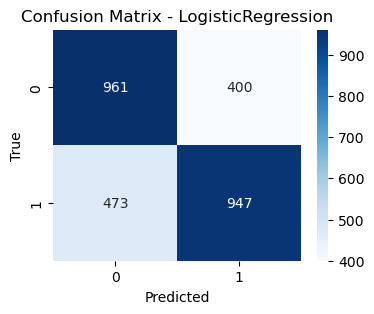

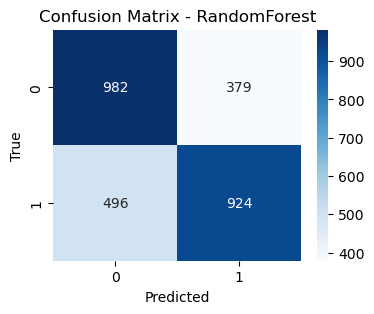

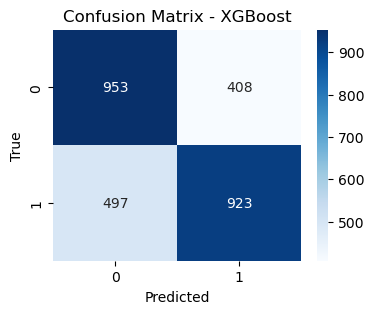

[LightGBM] [Info] Number of positive: 5532, number of negative: 5591
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 695
[LightGBM] [Info] Number of data points in the train set: 11123, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497348 -> initscore=-0.010609
[LightGBM] [Info] Start training from score -0.010609


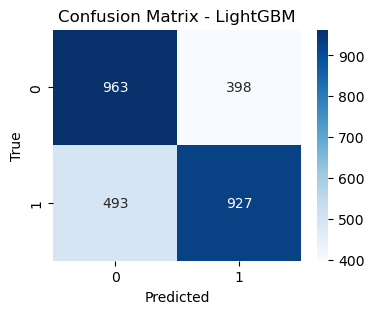

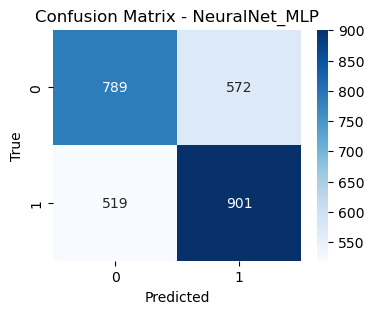

In [194]:
# ============================================================
# 7. TRAIN + EVALUATE ALL MODELS
# ============================================================

for name, model in models.items():

    # Normalized version for models that need it
    if name in ["LogisticRegression", "NeuralNet_MLP"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

    # Metrics
    acc = round(accuracy_score(y_test, y_pred),2)
    prec = round(precision_score(y_test, y_pred),2)
    rec = round(recall_score(y_test, y_pred),2)
    f1 = round(f1_score(y_test, y_pred),2)
    auc = round(roc_auc_score(y_test, y_prob),2)

    results.append([name, acc, prec, rec, f1, auc])

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [195]:
# ============================================================
# 8. RECAP TABLE
# ============================================================

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1", "AUC"])
print("\n===== Résumé des Performances =====\n")
results_df.sort_values("Accuracy", ascending=False)



===== Résumé des Performances =====



,Model,Accuracy,Precision,Recall,F1,AUC
0,LogisticRegression,0.69,0.70,0.67,0.68,0.76
1,RandomForest,0.69,0.71,0.65,0.68,0.75
3,LightGBM,0.68,0.70,0.65,0.68,0.74
2,XGBoost,0.67,0.69,0.65,0.67,0.74
4,NeuralNet_MLP,0.61,0.61,0.63,0.62,0.66


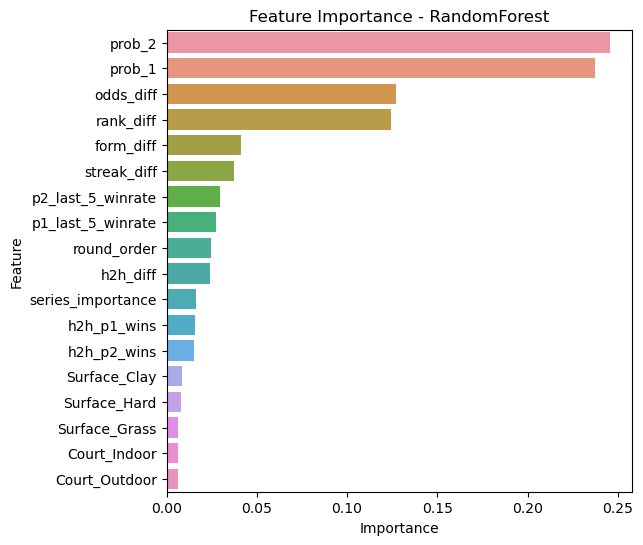

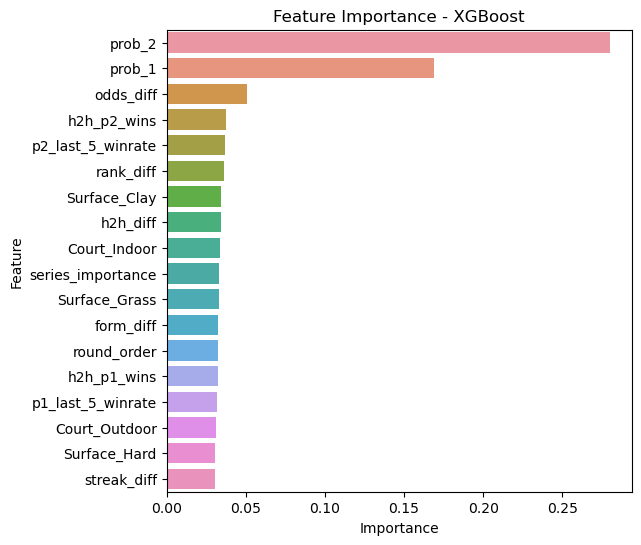

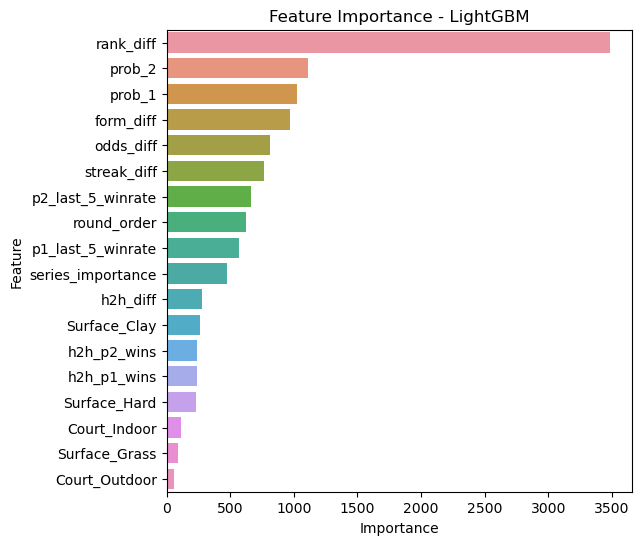

In [196]:
# ============================================================
# 9. FEATURE IMPORTANCE (Tree Models Only)
# ============================================================

tree_models = ["RandomForest", "XGBoost", "LightGBM"]

for name in tree_models:
    model = models[name]
    importance = pd.DataFrame({
        "Feature": feature_cols,
        "Importance": model.feature_importances_
    }).sort_values("Importance", ascending=False)

    plt.figure(figsize=(6, 6))
    sns.barplot(y="Feature", x="Importance", data=importance)
    plt.title(f"Feature Importance - {name}")
    plt.show()